In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [2]:
reverse_map = {'Abbotsford': 'Abbotsford, BC',
         'Barrie': 'Barrie, ON',
         'Brampton': "Brampton, ON",
         'Burlington': 'Burlington, ON',
         'Burnaby': 'Burnaby, BC',
         'Calgary': 'Calgary, AB',
         'Coquitlam': 'Coquitlam, BC',
         'Edmonton': 'Edmonton, AB',
         'Fredericton': 'Fredericton, NB',
         'Guelph': 'Guelph, ON',
         'Halifax': 'Halifax, NS',
         'Hamilton': 'Hamilton, ON',
         'Kamloops': 'Kamloops, BC',
         'Kelowna': 'Kelowna, BC',
         'Kingston': 'Kingston, ON',
         'Kitchener': 'Kitchener, ON',
         'Langley, BC': 'Langley, BC',
         'Lethbridge, AB': 'Lethbridge, AB',
         'London':'London, ON',
         'Markham': 'Markham ON',
         'Mississauga': 'Mississauga, ON',
         'Moncton': 'Moncton, NB',
         'Montreal': 'Montreal, QC',
         'Nanaimo, BC': 'Nanaimo, BC',
         'New Westminster': 'New Westminster, BC',
         'North Vancouver': 'North Vancouver, BC',
         'Oakville': 'Oakville, ON',
         'Oshawa': 'Oshawa, ON',
         'Ottawa': 'Ottawa, ON',
         'Quebec City': 'Quebec City, QC',
         'Red Deer': 'Red Deer, AB',
         'Regina': 'Regina, SK',
         'Richmond Hill': 'Richmond Hill, ON',
         "Saint John's": "Saint John's, NL",
         'Saskatoon': 'Saskatoon, SK',
         'St.Catharines': 'St.Catharines, ON',
         'Sudbury': 'Sudbury, ON',
         'Surrey': 'Surrey, BC',
         'Thunder Bay': 'Thunder Bay, ON',
         'Toronto': 'Toronto, ON',
         'Vancouver':'Vancouver, BC',
         'Vaughan': 'Vaughan, ON',
         'Victoria': 'Victoria, BC',
         'Waterloo': 'Waterloo, ON',
         'Windsor': 'Windsor, ON',
         'Winnipeg': 'Winnipeg, MB'
}

In [3]:
jobs = pd.read_csv("DataSet/JobPostDetails/data.csv")
noc_element = pd.read_csv("DataSet/NOC/noc-cnp-2016-element-v4-eng.csv")
noc_structure = pd.read_csv("DataSet/NOC/noc-cnp-2016-structure-v4-eng.csv")
job_levels = pd.read_csv("DataSet/NOC/JobLevels.csv")
numbeo = {}
for dataset in os.listdir("DataSet/Numbeo Data"):
    data = dataset.split(".")[0]
    numbeo[data] = pd.read_csv("DataSet/Numbeo Data/" + dataset)
    numbeo[data].drop("Rank", axis = 1, inplace=True)
    numbeo[data]["City"] = numbeo[data]["City"].apply(lambda x: reverse_map[x])

In [4]:
#Filter the noc_structure to only Unit group and select relevant columns
noc_structure = noc_structure[noc_structure["Hierarchical structure"] == "Unit group"]
noc_structure["Code"] = noc_structure["Code"].astype(np.float64)
noc_structure = noc_structure[["Code", "Class title", "Class definition"]]

#Convert NocNo from job levels to float to merge
job_levels["NocNo"] = job_levels["NocNo"].astype(np.float64)

In [28]:
#Merge the NOC information with jobs
noc_info = pd.merge(noc_structure, job_levels, left_on="Code", right_on="NocNo", how="inner")
noc_info = noc_info.drop("Code", axis=1)

jobs_noc_merged = pd.merge(noc_info, jobs, on="NocNo", how="inner") 

In [29]:
#These are the numbeo datasets
numbeo.keys()

dict_keys(['Crime', 'Traffic', 'HealthCare', 'Quality of Life', 'CostofLiving', 'PropertyPrices'])

In [30]:
numbeo_key = "PropertyPrices"

In [31]:
merged = pd.merge(jobs_noc_merged, numbeo[numbeo_key], on="City", how="inner")

In [17]:
#Is health correlated to the amount of pollution?
method = "spearman"
pd.merge(numbeo["CostofLiving"], numbeo["PropertyPrices"], on="City",  how="inner").corr(method=method)

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Price To Income Ratio,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Price To Rent Ratio City Centre,Price To Rent Ratio Outside Of City Centre,Mortgage As A Percentage Of Income,Affordability Index
Cost of Living Index,1.000000,0.119911,0.367560,0.785095,0.419355,-0.135929,0.111012,-0.191345,-0.087430,0.191991,0.087430,0.127030,-0.124875
Rent Index,0.119911,1.000000,0.946490,-0.061179,0.106563,-0.065184,0.698776,-0.412059,-0.256507,0.412236,0.256507,0.655172,-0.656205
Cost of Living Plus Rent Index,0.367560,0.946490,1.000000,0.119702,0.232506,-0.056514,0.653688,-0.391633,-0.265881,0.392035,0.265881,0.616754,-0.616875
Groceries Index,0.785095,-0.061179,0.119702,1.000000,0.020245,-0.138598,-0.010901,-0.202247,-0.076752,0.200445,0.076752,0.011791,-0.010017
Restaurant Price Index,0.419355,0.106563,0.232506,0.020245,1.000000,-0.085206,0.035818,0.083435,0.084316,-0.082091,-0.084316,0.075417,-0.073011
Local Purchasing Power Index,-0.135929,-0.065184,-0.056514,-0.138598,-0.085206,1.000000,-0.365517,-0.017577,-0.142158,0.015795,0.142158,-0.431368,0.431608
Price To Income Ratio,0.111012,0.698776,0.653688,-0.010901,0.035818,-0.365517,1.000000,-0.754700,-0.658287,0.754839,0.658287,0.987097,-0.986533
Gross Rental Yield City Centre,-0.191345,-0.412059,-0.391633,-0.202247,0.083435,-0.017577,-0.754700,1.000000,0.701969,-0.999889,-0.701969,-0.726888,0.728406
Gross Rental Yield Outside of Centre,-0.087430,-0.256507,-0.265881,-0.076752,0.084316,-0.142158,-0.658287,0.701969,1.000000,-0.701446,-1.000000,-0.627141,0.625487
Price To Rent Ratio City Centre,0.191991,0.412236,0.392035,0.200445,-0.082091,0.015795,0.754839,-0.999889,-0.701446,1.000000,0.701446,0.727253,-0.728770


In [21]:
#What industry is hiring the most? Top 100
n = 100
jobs_noc_merged["Class title"].value_counts()[:n]

Cooks                                                      2896
Food service supervisors                                   2218
Retail salespersons                                        2212
Transport truck drivers                                    1730
Other customer and information services representatives    1371
                                                           ... 
User support technicians                                    148
Mechanical engineers                                        147
Human resources and recruitment officers                    146
Graphic designers and illustrators                          143
Other administrative services managers                      142
Name: Class title, Length: 100, dtype: int64

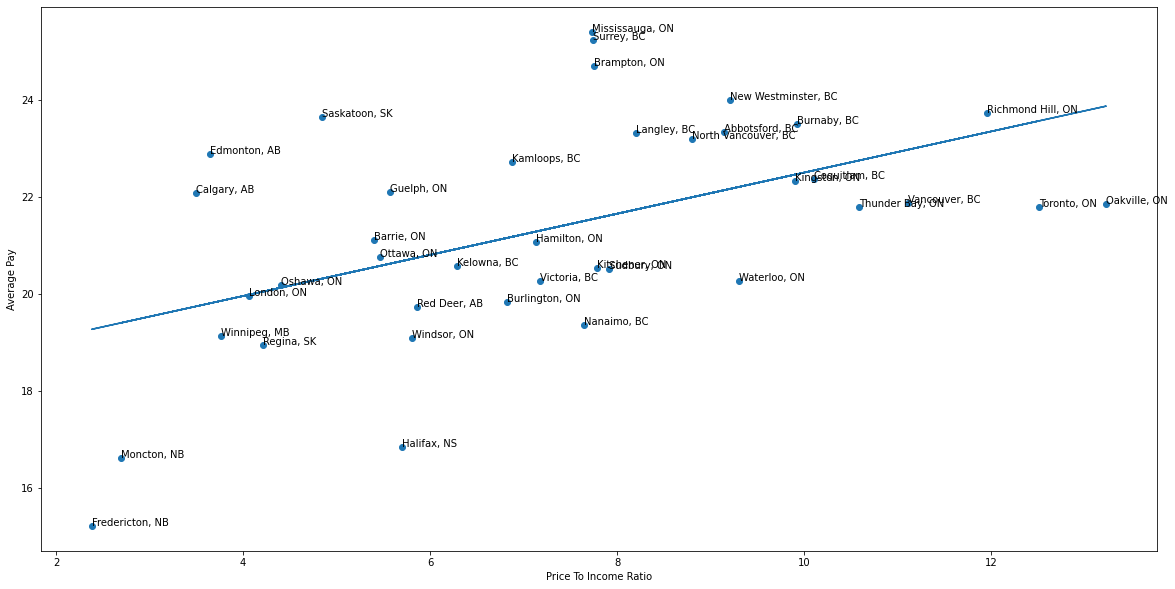

In [62]:
#Cities with highest pay and lowest housing prices (Best places to move)?
#Consider only hourly
pay_property_merged = merged[merged["PayUnit"] == "HOUR"]
city_pay = {"City":[], "Average Pay":[]}
for city, group in pay_property_merged.groupby("City"):
    group["MinPay"] = group["MinPay"].astype(np.float64)
    city_pay["City"].append(city)
    city_pay["Average Pay"].append(group["MinPay"].mean())
city_pay = pd.DataFrame(city_pay)
answer_dataframe = pd.merge(city_pay, numbeo[numbeo_key], on="City", how="inner")

independent_column = "Price To Income Ratio"
dependent_column = "Average Pay"

#Visualize
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(answer_dataframe[independent_column], answer_dataframe[dependent_column])
ax.set_xlabel(independent_column)
ax.set_ylabel(dependent_column)

#Add labels
for i, txt in enumerate(answer_dataframe["City"]):
    ax.annotate(txt, (answer_dataframe[independent_column][i], answer_dataframe[dependent_column][i]))

#Line of best fit
m, b = np.polyfit(answer_dataframe[independent_column], answer_dataframe[dependent_column], 1)
ax.plot(answer_dataframe[independent_column], m*answer_dataframe[independent_column]+b)